# **Ejercicios: Introducción al procesamiento de señal**
## Procesamiento de Imagen y Señal
### **ESCRIBE TU NOMBRE AQUI**
### Curso 2024-2025

In [2]:
import math
import cmath

import os
import sys

##

import warnings
warnings.filterwarnings('ignore')

##

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.image as im

import plotly
import plotly.express as px

from itertools import cycle

# pip install PyWavelets
import pywt

from scipy import signal, fftpack

from scipy.signal import chirp, spectrogram

### Audio
import IPython.display as ipd
import librosa
import librosa.display

import soundfile as sf

#### Important tips
# To hear the signal
# ipd.Audio(x, rate=fs)
####

### Image
from PIL import Image
from skimage import io
import cv2
# python -m pip install tensorflow==2.10
# import tensorflow as tf

In [3]:
# Funciones auxiliares
path = "code/"

# Add the directory containing your module to the Python path (wants absolute paths)
sys.path.append(os.path.abspath(path))

from f_plot import *
from f_color import *
from f_get_random import *

---

# **Señales básicas**

<hr style="border: 1px solid pink" />


1. Genera una de las siguientes señales básicas:
   1. Función impulso
   2. Tren de impulsos
   3. Función delta de Dirac
   4. Función escalón de Heaviside
   5. Señal rampa
   6. Señal rampa modificada
   7. Función parabólica
   8. Función signo
   9. Función exponencial (caso 1, caso2, caso3)
   10. Función rectangular periódica
   11. Función triangular
   12. Función seno cardinal normalizada ($sinc$)
   13. Función seno cardinal "desnormalizada" (*sampling*)

Utiliza la función `get_random_number()` (ver fichero `code/f_plot.y`) para seleccionar una de las señales.

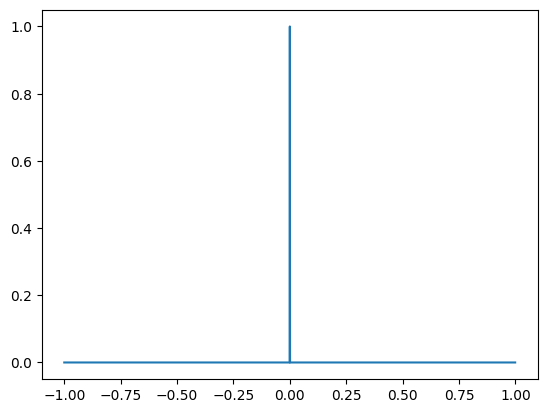

In [4]:
# Genera la funcion y visualizala
x = np.arange(-1.0, 1.0, 0.001)
def impulse(x: np.array):
    y = np.zeros(x.shape)
    
    e = 1e-6
    y[(x >= -e) & (x <= e)] = 1
    return y

# Seleccionamos una de las señales anteriores
y = impulse(x)
plt.plot(x, y)


---

# **Tipos de señales**

<hr style="border: 1px solid pink" />

2. Visualiza las siguientes señales:
$$s_{1}\left(t\right)=\sin\left(10\pi t\right)+13$$
$$s_{2}\left(t\right)=e^{0.1t}+7t-2$$
$$s_{3}\left(t_{1},t_{2}\right)=\sin\left(2t_{1}+13t_{2}\right)$$

Utiliza la función `get_random_number()` (ver fichero `code/f_plot.y`) para seleccionar una de las señales.

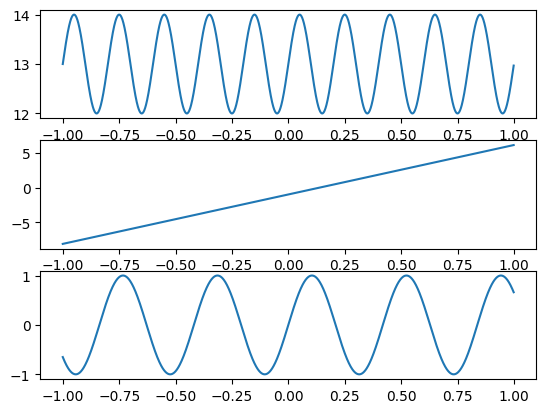

In [5]:
# Genera y visualiza la señal
x = np.arange(-1.0, 1.0, 0.001)
def s1(x):
    return np.sin(10 * np.pi * x) + 13

def s2(x):
    return np.exp(0.1*x) + 7 * x -2

def s3(x1, x2):
    return np.sin(2*x1 + 13*x2)

# Seleccionamos una de las señales anteriores
f, axs = plt.subplots(3)
axs[0].plot(x, s1(x))
axs[1].plot(x, s2(x))
axs[2].plot(x, s3(x, x))


<hr style="border: 1px solid green" />

3. *Señal de voz (señal unidimensional)*
   
* Obtén los 6 primeros segundos de la señal de voz **`audio_voz/26301-01_short_austen.wav`** (*Pride and prejudice* de Jane Austen). Oye estos 6 segundos de la señal después de guardarlos en un fichero (formato **`wav`**).
* Obtén los 6 primeros segundos de la señal de voz **`audio_voz/23976-01_short_london.wav`** (*White Fang* de Jack London). Oye estos 6 segundos de la señal después de guardarlos en un fichero (formato **`wav`**).

Utiliza la función `get_random_number()` (ver fichero `code/f_plot.y`) para seleccionar una de las señales de voz.

Fichero WAV:  Fs = 22050, x.shape = (132300,), x.dtype = float32


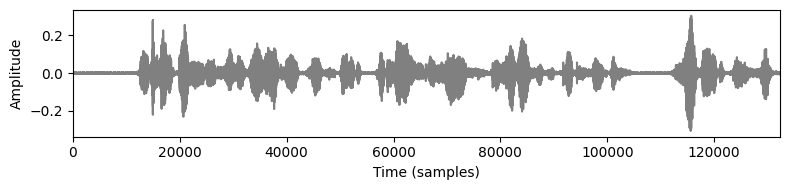

Fichero MP3:  Fs = 24000, x.shape = (144000,), x.dtype = float32


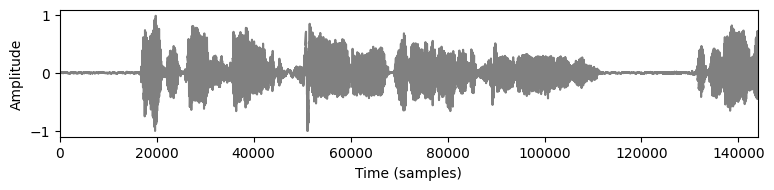

In [6]:
# Realiza la tarea
import librosa

# Lee wav
fn_wav = os.path.join('audio_voz/', '26301-01_short_austen.wav')
x, fs = librosa.load(fn_wav, sr=None, duration=6.0)
print_plot_play(x, fs, text='Fichero WAV: ')

# Lee mp3
fn_mp3 = os.path.join('audio_voz/', '23976-01_short_london.wav')
x, fs = librosa.load(fn_mp3, sr=None, duration=6.0)
print_plot_play(x, fs, text='Fichero MP3: ')

<hr style="border: 1px solid green" />

4. Indica si las funciones siguientes son pares o impares: 
    1. $x(t)=t$
    2. $x(t)=\left| t \right|$
    3. $x(t)=t^2$
    4. $x(t)=t^3$
    5. $x(t)=t^4$
    6. $x(t)=t+t^4$
    7. $x(t)=\left| -e^t \right|$
    8. $x(t)=\frac{1}{t}$
    9. $x(t)=\frac{1}{t^2}$
    10. $x(t)=sin(t)$
    11. $x(t)=cos(t)$

Utiliza la función `get_random_number()` (ver fichero `code/f_plot.y`) para seleccionar una de las funciones.

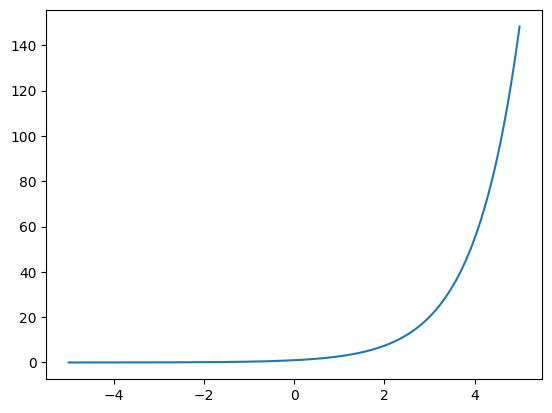

In [11]:
# Genera y visualiza la señal
x = np.arange(-5.0, 5.0, 0.001)
def y(x):
    return np.abs(- np.exp(x))

plt.plot(x, y(x)) # Impar porque f(x) != f(-x)

<hr style="border: 1px solid green" />

5. Ruido blanco: Lee y oye la señal y, también, visualiza el espectrograma de una señal ruidosa (onda aperiódica): `audio/Pure_White_Noise_Sample.mp3`. A la hora de oir esta señal, ten cuidado ya que puede resultar ser un sonido molesto.

Fichero WAV:  Fs = 44100, x.shape = (245376,), x.dtype = float32


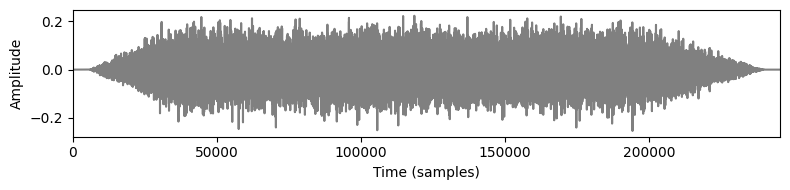

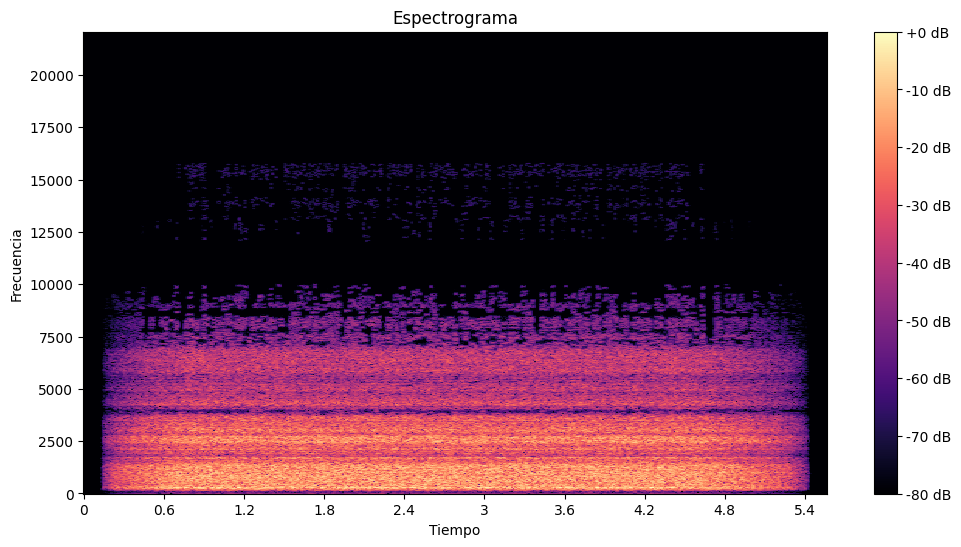

In [18]:
# Lee y oye la señal. Visualiza su espectro.
fn_wav = os.path.join('audio', 'Pure_White_Noise_Sample.mp3')
audio, sr = librosa.load(fn_wav, sr=None, duration=6.0) # Audio time series, sample rate
print_plot_play(x, sr, text='Fichero WAV: ')

# Visualizar el espectro de la señal
S = librosa.stft(audio) # Espectrograma con STFT
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Graficar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

<hr style="border: 1px solid green" />

6. Indica si las funciones siguientes son periódicas o no:
    1. $x(t)=t^2$
    2. $x(t)=t^3$
    3. $x(t)=e^t$
    4. $x(t)=\frac{1}{t}$

Utiliza la función `get_random_number()` (ver fichero `code/f_plot.y`) para seleccionar una de las funciones.

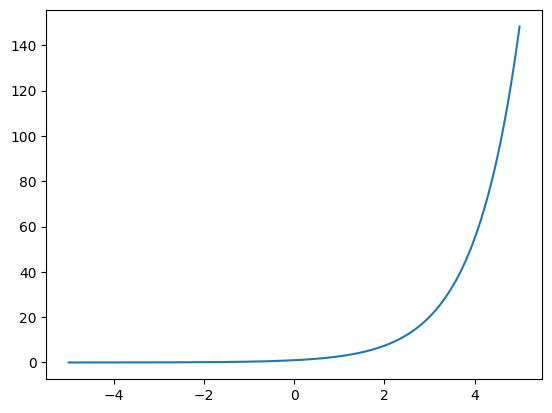

In [25]:
# Genera y visualiza la señal
x = np.arange(-5.0, 5.0, 0.001)
def y(x):
    return np.exp(x)

# No es periodica porque no cumple f(x+T)=f(x) para ningún periodo T
plt.plot(x, y(x)) 

7. Visualiza una de las siguientes imágenes utilizando cualquiera de las siguientes funciones:
    * Función [**`imread()`**](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread) de la librería `skimage`
    * Función [**`Image.open()`**](https://pillow.readthedocs.io/en/stable/reference/Image.html) de la librería `PIL`
    * Función [**`imread()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) de la librería `matplotlib`
    * Función [**`imread()`**](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/) de la librería `OpenCV`

    Las imágenes son las siguientes:
      1. Blanco y Negro: `images_formatos/ehu_logo.jpg`
      2. PNG (rgb): `images_formatos/smarties.png`
      3. JPG (rgb): `images_formatos/imagen_RGB.jpg`
      4. JPG (rgb): `images_formatos/beach.jpg`
      5. TIFF (rgb): `images_formatos/dunes_gobi.tif`
      6. PNG (rgb): `images_formatos/elephant.png`
      7. JPG (gray): `images_formatos/Titanic.jpg`
      8. PNG (rgb): `images_formatos/clock.png`

Utiliza la función `get_random_number()` (ver fichero `code/f_plot.y`) para seleccionar una de las imágenes.

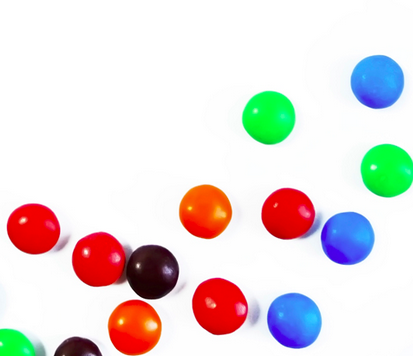

In [27]:
image_path = "images_formatos/smarties.png"
image = Image.open(image_path)
image

<hr style="border: 1px solid green" />

7. Importa y visualiza una señal ECG de 5 segundos (*modified limb lead* II, MLII): `data_ECG/sample_file_ECG.csv`.

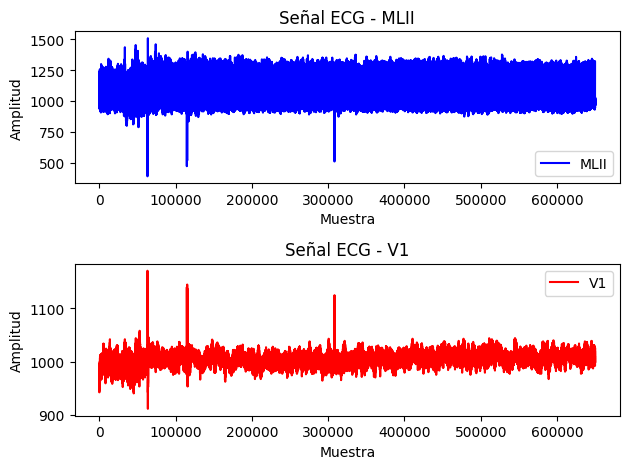

In [30]:
data_path = "data_ECG/sample_file_ECG.csv"
data = pd.read_csv(data_path)

samples = data['sample']    # ïndice de la muestra
ml2     = data['MLII']      # Señal del electrodo MLII
v1      = data['V1']        # Señal del electrodo V1

# Graficar MLII
plt.subplot(2, 1, 1)
plt.plot(samples, ml2, label='MLII', color='blue')
plt.title('Señal ECG - MLII')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.legend()

# Graficar V1
plt.subplot(2, 1, 2)
plt.plot(samples, v1, label='V1', color='red')
plt.title('Señal ECG - V1')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

---

# **Conceptos básicos**

<hr style="border: 1px solid pink" />

*Funciones sinusoidales* 

Una función sinusoidal puede ser descrita a partir de la función coseno donde $n$ es la variable independiente (el índice de tiempo), $A$ es la amplitud de la oscilación, $\omega$ es la velocidad angular (frecuencia) que es igual a $2 \pi f$ siendo $f$ la frecuencia en Hz de la oscilación y $\varphi$ la fase inicial (en radianes).

$$x[n] = A \cdot cos (\omega nT + \varphi) = A \cdot cos (2 \pi fnT + \varphi)$$
El periodo de muestreo (en segundos) viene dado por: 

$$T = 1/f_{s} \quad  siendo \quad t = nT = n/f_{s}$$

<hr style="border: 1px solid green" />

8. Genera una sinusoide con una amplitud de $0.8$, una frecuencia fundamental de $1000$ Hz y una tasa de muestreo de $44100$ muestras/s.
    + Añade un poco de ruido a la señal.
    + Visualiza el espectro de ambas señales (con y sin ruido).
    + Oye ambas señales.

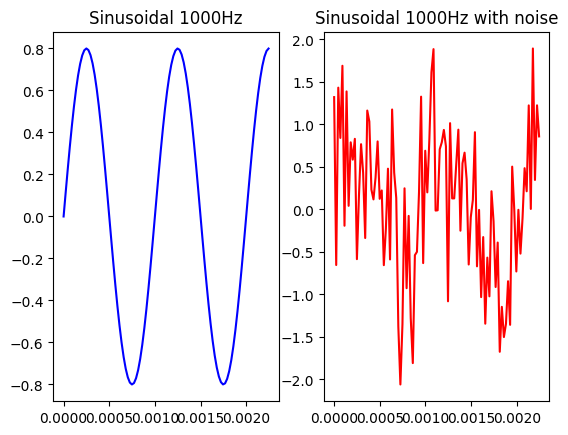

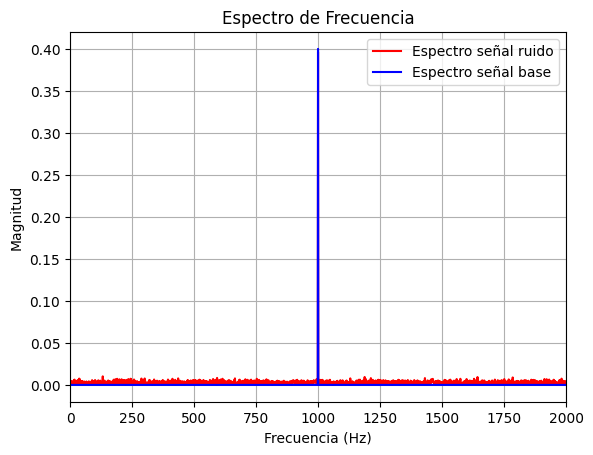

In [81]:
# Genera las señales
# Visualiza el espectro de ambas señales
# Oye ambas señales

amp         = 0.8   # Amplitud de la señal base
amp_noise   = 0.7   # Amplitud del ruido blanco
frec        =1000   # Hz
t_muestreo  = 44100 # Hz
duracion    = 1     # s

# Generar y visualizar las señales
N = int(t_muestreo * duracion) # Numero total de muestras
ruido_blanco = amp_noise * np.random.randn(N) # Señal de ruido

t       = np.linspace(0, duracion, N, endpoint=False)
y       = amp * np.sin(2*np.pi * frec * t)    # Señal sinusoidal base
y_noise = y + ruido_blanco

# Comparar las dos señales
f, axs = plt.subplots(1, 2)
plot_samples = 100
axs[0].set_title(f"Sinusoidal {frec}Hz") 
axs[0].plot(t[:plot_samples], y[:plot_samples], color = "blue") 
axs[1].set_title(f"Sinusoidal {frec}Hz with noise") 
axs[1].plot(t[:plot_samples], y_noise[:plot_samples], color = "red")
plt.show()

# Escuchar
ipd.display(ipd.Audio(data=y, rate=t_muestreo))
ipd.display(ipd.Audio(data=y_noise, rate=t_muestreo))

# Calculo del espectrograma con FFT
frequencias = np.fft.fftfreq(N, 1/t_muestreo)   # Vector de frecuencias
frecs_pos   = frequencias[:N//2]                # Frecuencias positivas 
f           = np.fft.fft(y)                     # Calcular la FFT
f_pos       = np.abs(f[:N//2]) / N              # Normalización
f_noise     = np.fft.fft(y_noise)               # Calcular la FFT
f_noise_pos = np.abs(f_noise[:N//2]) / N        # Normalización

# Visualizar el espectro
plt.plot(frecs_pos, f_noise_pos, color="red", label='Espectro señal ruido')
plt.plot(frecs_pos, f_pos, color="blue", label='Espectro señal base')
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.xlim(0, 2000) 
plt.show()


<hr style="border: 1px solid green" />

9. Dibuja cuatro ondas seno/coseno en una sola figura donde $A$ es $1, 2, 3, 4$ y el intervalo de tiempo $t$ va de 0s a 1s con un incremento de $\Delta = [0.01, 0.02]$ segundos. Suma todas las ondas y genera una onda resultante. Dibuja dicha onda. Las ondas y el incremento de tiempo se especifican en tu cuestionario.

In [ ]:
# Genera y visualiza

# Selecciona el tipo de función a utilizar: sin() o cos() o una combinacion de ambas
# Selecciona el intervalo de tiempo que vas a utilizar: 1 segundo ó 2 segundos
# Selecciona el incremento del intervalo de tiempo que vas a utilizar: delta = 0.01 ó 0.02

<hr style="border: 1px solid green" />

10. *Funciones seno de baja, media y alta frecuencia* 

    Suma tres ondas seno/coseno de baja, media y alta frecuencia, $\sin(2 \pi f_{A}t)$, $A_{1} \cdot \sin(2 \pi f_{B} t)$ y $A_{2} \cdot \sin(2\pi f_{C}t)$ respectivamente, donde el intervalo de tiempo ($t$) va de 0s a 1s con incremento de $\frac{1}{8000}$ s y las frecuencias son: $f_{A}$, $f_{B}$ y $f_{C}$. Finalmente, oye la señal y visualiza la onda y su espectro. Selecciona los siguientes parámetros para generar las funciones:
    * $fs$ = frecuencia de muestreo (por ejemplo, $8000$ Hz)
    * $f_A$, $f_B$ y $f_C$ = frecuencias de baja, media y alta frecuencia (por ejemplo, $f_A = 10$ Hz, $f_B = 100$ Hz, $f_C = 1000$ Hz)

In [ ]:
# Genera, visualiza y oye la señal

<hr style="border: 1px solid green" />

*Funciones sinusoidales complejas*

Recordemos que una función sinusoidal compleja produce una respuesta compleja y, por tanto, si queremos representar gráficamente la función visualizaremos tanto su parte real como su parte imaginaria.

$$x[n] = A e^{j ( \omega n T + \varphi )} = A e^{\varphi} e^{j ( \omega n T )}$$
$$x[n] = A \cos ( \omega n T + \varphi ) + jA \sin ( \omega n T + \varphi)$$

<hr style="border: 1px solid green" />

11. Conversión de `PIL` a `numpy` array y viceversa. Aplíca la función a la imagen que desees.

In [ ]:
# Genera la funcion de conversion y aplica la funcion a una imagen

12. Oye y visualiza el espectrograma del audio (`audio/sirena.wav`). Oye este audio pero con cuidado ya que puede ser un sonido muy agudo.

In [ ]:
# Lee y oye la señal
# Visualiza su espectro

---

# **Referencias**

Nos parece muy interesante el libro digital de uso libre no solamente para esta clase de repaso de conceptos matemáticos sino para todas las clases de este módulo de procesamiento de la señal digital.

[**Sinusoides (libro web)**](https://ccrma.stanford.edu/~jos/mdft/Sinusoids.html)

[***Spectral Audio Signal Processing***](https://www.dsprelated.com/freebooks/sasp/)

[**Demos**](http://pages.jh.edu/~signals/)